# K-Nearest Neighbors
---

### finds distance from other data points, the class to which the closest k points belongs to is the predicted class

In [1]:
# using sklearn==0.18.2 and scipy==1.2.3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

data_set = pd.read_csv('Social_Network_Ads.csv')
data_set

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [2]:
data_set.info()
data_set.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [3]:
X = data_set.iloc[:,[2,3]].values
y = data_set.iloc[:,4:].values
# X
# y

In [4]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state = 0)

c:\users\skrstv\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
from sklearn.preprocessing import StandardScaler as stdsc
sc_X =  stdsc()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

## KNN part

In [6]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [7]:
classifier = KNN(n_neighbors = 5, metric = 'minkowski', p = 2) #metric=minkowski and p=2 means we're using euclidean distance
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
y_pred = classifier.predict(X_test)

## evaluating the performance of the model

In [9]:
from sklearn.metrics import confusion_matrix as confmat
cm = confmat(y_test,y_pred)
cm

array([[64,  4],
       [ 3, 29]])

In [10]:
# the count of true negatives is :math:`cm[0,0]`, 
# false negatives is :math:`cm[1,0]`,
# true positives is:math:`cm[1,1]` and
# false positives is :math:`cm[0,1]`.

# [[TN, FN],
#  [FP, TP]]
    
# so 5+7 is the count of wrong predictions

##  Error vs. K
---

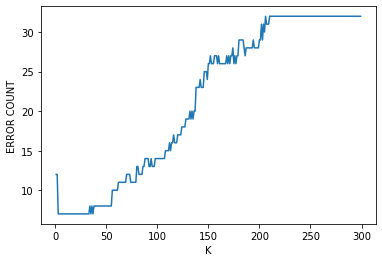

In [11]:
y_error =[]
for k in range(1,300): #300 is the sample count
    test = KNN(n_neighbors = k, metric = 'minkowski', p = 2) 
    test.fit(X_train,y_train)
    y_pred_test = test.predict(X_test)
    cm_test = confmat(y_test,y_pred_test)
    y_error.append(cm_test[0][1] + cm_test[1][0])
plt.xlabel('K')
plt.ylabel('ERROR COUNT')
plt.plot(range(1,300),y_error)